In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pylab
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-crime/train.csv.zip
/kaggle/input/sf-crime/sampleSubmission.csv.zip
/kaggle/input/sf-crime/test.csv.zip


In [2]:
train_data=train_data=pd.read_csv('/kaggle/input/sf-crime/train.csv.zip')
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
test_data=test_data=pd.read_csv('/kaggle/input/sf-crime/test.csv.zip')
test_data.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [4]:
train_data.info()
train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


(878049, 9)

In [5]:
test_data.info()
test_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


(884262, 7)

In [6]:
train_data.describe

<bound method NDFrame.describe of                       Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
...                     ...                     ...   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek PdDistrict  \
0                                  WARRANT ARREST  Wednesday   NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3    

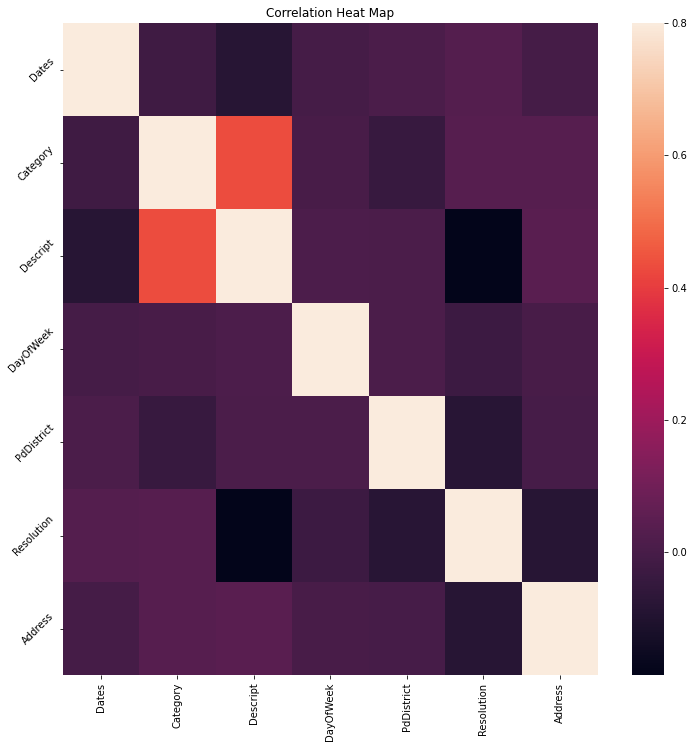

In [7]:
d = defaultdict(LabelEncoder)
sf_encode = train_data.apply(lambda x: d[x.name].fit_transform(x))
sf_encode = sf_encode.drop(['X', 'Y'], axis=1)

corrmat = sf_encode.corr()
f, ax = plt.subplots(figsize=(12, 12))
plot2 =sns.heatmap(corrmat, vmax=.8);
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plot2.axes.set_title('Correlation Heat Map')
plt.show()

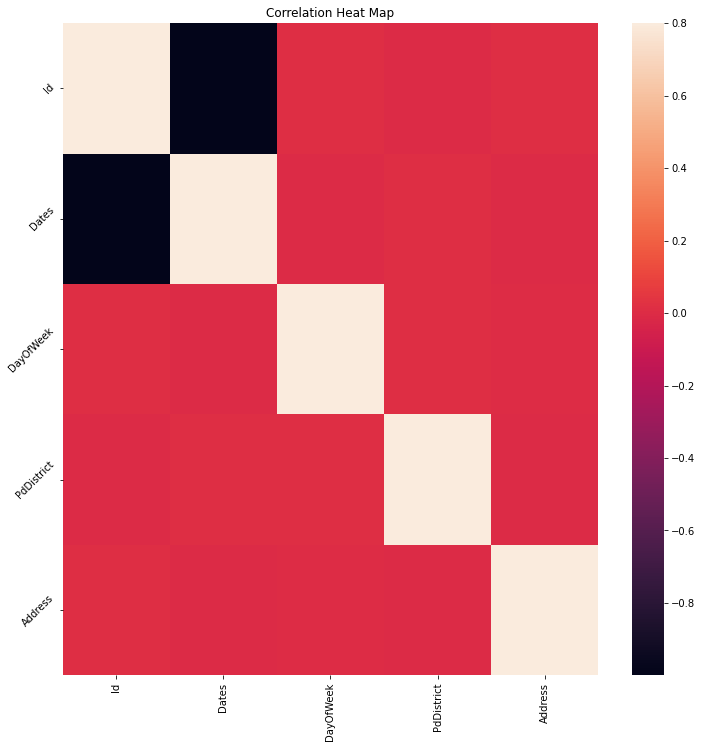

In [8]:
d = defaultdict(LabelEncoder)
sf_encode = test_data.apply(lambda x: d[x.name].fit_transform(x))
sf_encode = sf_encode.drop(['X', 'Y'], axis=1)

corrmat = sf_encode.corr()
f, ax = plt.subplots(figsize=(12, 12))
plot2 =sns.heatmap(corrmat, vmax=.8);
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plot2.axes.set_title('Correlation Heat Map')
plt.show()

[Text(0, 0, 'LARCENY/THEFT'),
 Text(1, 0, 'OTHER OFFENSES'),
 Text(2, 0, 'NON-CRIMINAL'),
 Text(3, 0, 'ASSAULT'),
 Text(4, 0, 'DRUG/NARCOTIC'),
 Text(5, 0, 'VEHICLE THEFT'),
 Text(6, 0, 'VANDALISM'),
 Text(7, 0, 'WARRANTS'),
 Text(8, 0, 'BURGLARY'),
 Text(9, 0, 'SUSPICIOUS OCC'),
 Text(10, 0, 'MISSING PERSON'),
 Text(11, 0, 'ROBBERY'),
 Text(12, 0, 'FRAUD'),
 Text(13, 0, 'FORGERY/COUNTERFEITING'),
 Text(14, 0, 'SECONDARY CODES'),
 Text(15, 0, 'WEAPON LAWS'),
 Text(16, 0, 'PROSTITUTION'),
 Text(17, 0, 'TRESPASS'),
 Text(18, 0, 'STOLEN PROPERTY'),
 Text(19, 0, 'SEX OFFENSES FORCIBLE'),
 Text(20, 0, 'DISORDERLY CONDUCT'),
 Text(21, 0, 'DRUNKENNESS'),
 Text(22, 0, 'RECOVERED VEHICLE'),
 Text(23, 0, 'KIDNAPPING'),
 Text(24, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(25, 0, 'RUNAWAY'),
 Text(26, 0, 'LIQUOR LAWS'),
 Text(27, 0, 'ARSON'),
 Text(28, 0, 'LOITERING'),
 Text(29, 0, 'EMBEZZLEMENT'),
 Text(30, 0, 'SUICIDE'),
 Text(31, 0, 'FAMILY OFFENSES'),
 Text(32, 0, 'BAD CHECKS'),
 Text(33, 0, 'BR

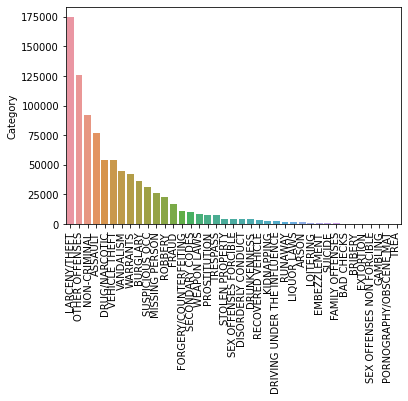

In [9]:
train_data.groupby("Category")["Category"].count().sort_values(ascending=False)
number_of_crimes = train_data.Category.value_counts()
_n_crime_plot = sns.barplot(x=number_of_crimes.index,y=number_of_crimes)
_n_crime_plot.set_xticklabels(number_of_crimes.index,rotation=90)

[Text(0, 0, 'SOUTHERN'),
 Text(1, 0, 'MISSION'),
 Text(2, 0, 'NORTHERN'),
 Text(3, 0, 'BAYVIEW'),
 Text(4, 0, 'CENTRAL'),
 Text(5, 0, 'TENDERLOIN'),
 Text(6, 0, 'INGLESIDE'),
 Text(7, 0, 'TARAVAL'),
 Text(8, 0, 'PARK'),
 Text(9, 0, 'RICHMOND')]

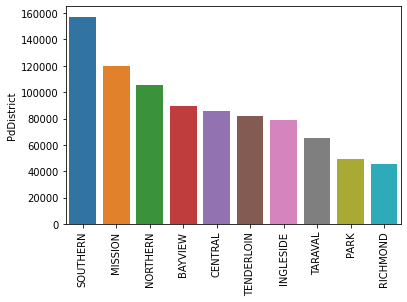

In [10]:
train_data.groupby("PdDistrict")["PdDistrict"].count().sort_values(ascending=False)
most_dangerous_districts = train_data.PdDistrict.value_counts()
_n_crime_plot = sns.barplot(x=most_dangerous_districts.index,y=most_dangerous_districts)
_n_crime_plot.set_xticklabels(most_dangerous_districts.index,rotation=90)

[Text(0, 0, 'SOUTHERN'),
 Text(1, 0, 'MISSION'),
 Text(2, 0, 'NORTHERN'),
 Text(3, 0, 'BAYVIEW'),
 Text(4, 0, 'CENTRAL'),
 Text(5, 0, 'TENDERLOIN'),
 Text(6, 0, 'INGLESIDE'),
 Text(7, 0, 'TARAVAL'),
 Text(8, 0, 'PARK'),
 Text(9, 0, 'RICHMOND')]

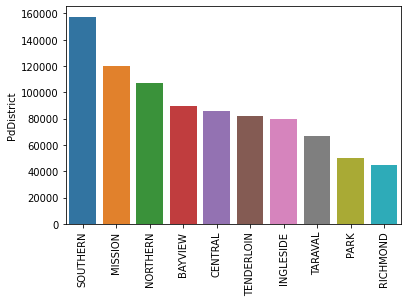

In [11]:
test_data.groupby("PdDistrict")["PdDistrict"].count().sort_values(ascending=False)
most_dangerous_districts = test_data.PdDistrict.value_counts()
_n_crime_plot = sns.barplot(x=most_dangerous_districts.index,y=most_dangerous_districts)
_n_crime_plot.set_xticklabels(most_dangerous_districts.index,rotation=90)

Text(0.5, 1.0, 'Number of Crimes per District')

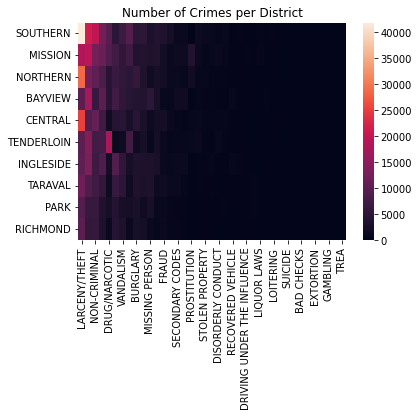

In [12]:
pt = pd.pivot_table(train_data,index="PdDistrict",columns="Category",aggfunc=len,fill_value=0)["Dates"]
_ = pt.loc[most_dangerous_districts.index,number_of_crimes.index]
ax = sns.heatmap(_)
ax.set_title("Number of Crimes per District")

In [13]:
train_data['Dates'] = train_data['Dates'].astype('datetime64[ns]')
train_data['Hour']= train_data.Dates.dt.hour
test_data['Dates'] = test_data['Dates'].astype('datetime64[ns]')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


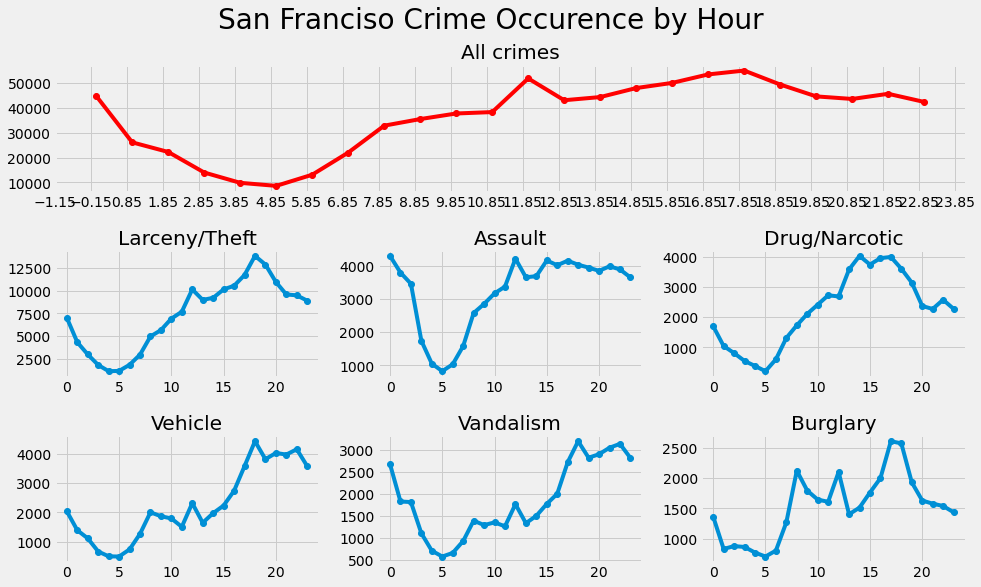

In [14]:
pylab.rcParams['figure.figsize'] = (14.0, 8.0)

larceny = train_data[train_data['Category'] == "LARCENY/THEFT"]
assault = train_data[train_data['Category'] == "ASSAULT"]
drug = train_data[train_data['Category'] == "DRUG/NARCOTIC"]
vehicle = train_data[train_data['Category'] == "VEHICLE THEFT"]
vandalism = train_data[train_data['Category'] == "VANDALISM"]
burglary = train_data[train_data['Category'] == "BURGLARY"]

with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
    ax1.plot(train_data.groupby('Hour').size(), 'ro-')
    ax1.set_title ('All crimes')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    
    ax2 = plt.subplot2grid((3,3), (1, 0))
    ax2.plot(larceny.groupby('Hour').size(), 'o-')
    ax2.set_title ('Larceny/Theft')
    
    ax3 = plt.subplot2grid((3,3), (1, 1))
    ax3.plot(assault.groupby('Hour').size(), 'o-')
    ax3.set_title ('Assault')
    
    ax4 = plt.subplot2grid((3,3), (1, 2))
    ax4.plot(drug.groupby('Hour').size(), 'o-')
    ax4.set_title ('Drug/Narcotic')
    
    ax5 = plt.subplot2grid((3,3), (2, 0))
    ax5.plot(vehicle.groupby('Hour').size(), 'o-')
    ax5.set_title ('Vehicle')
    
    ax6 = plt.subplot2grid((3,3), (2, 1))
    ax6.plot(vandalism.groupby('Hour').size(), 'o-')
    ax6.set_title ('Vandalism')
    
    ax7 = plt.subplot2grid((3,3), (2, 2))
    ax7.plot(burglary.groupby('Hour').size(), 'o-')
    ax7.set_title ('Burglary')
  
    pylab.gcf().text(0.5, 1.03, 
                     'San Franciso Crime Occurence by Hour',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout(2)
plt.show()

In [15]:
train_data['Dates'] = train_data['Dates'].astype('datetime64[ns]')
train_data['Month']= train_data.Dates.dt.month
train_data['Year']= train_data.Dates.dt.year
test_data['Dates'] = test_data['Dates'].astype('datetime64[ns]')
test_data['Month']= test_data.Dates.dt.month
test_data['Year']= test_data.Dates.dt.year

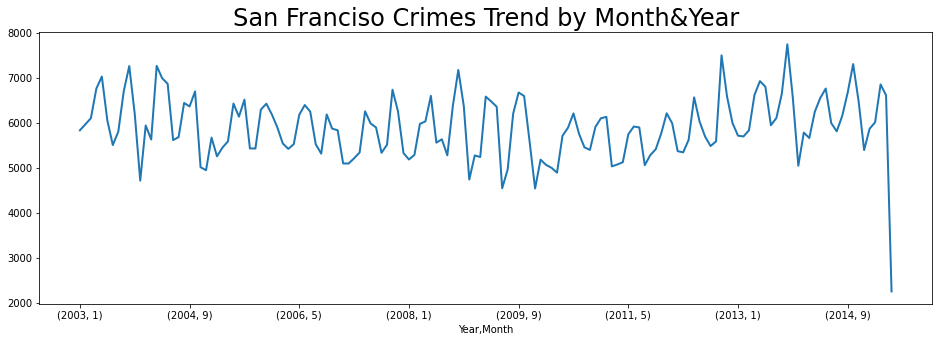

In [16]:
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
yearMonth = train_data.groupby(['Year','Month']).size()
ax = yearMonth.plot(lw=2)
plt.title('San Franciso Crimes Trend by Month&Year', fontsize=24)
plt.show()

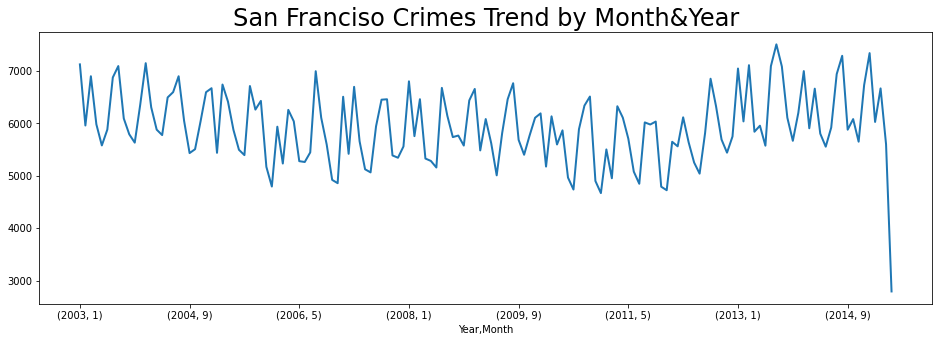

In [17]:
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
yearMonth = test_data.groupby(['Year','Month']).size()
ax = yearMonth.plot(lw=2)
plt.title('San Franciso Crimes Trend by Month&Year', fontsize=24)
plt.show()

[Text(0, 0, 'Friday'),
 Text(1, 0, 'Wednesday'),
 Text(2, 0, 'Saturday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Tuesday'),
 Text(5, 0, 'Monday'),
 Text(6, 0, 'Sunday')]

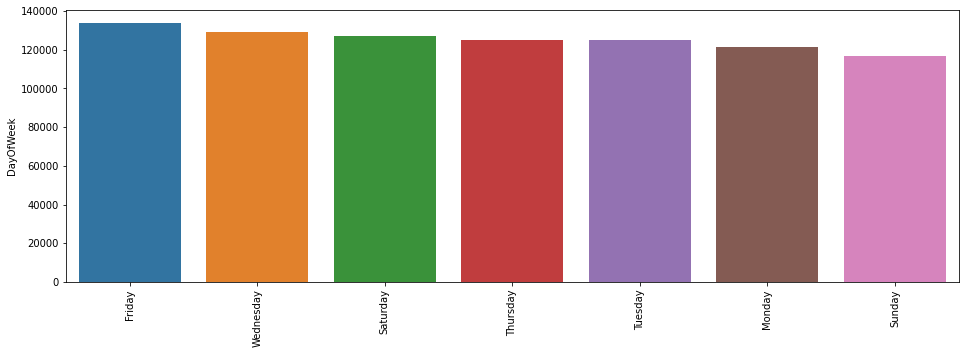

In [18]:
Days = train_data.DayOfWeek.value_counts()
Day_plot = sns.barplot(x=Days.index,y=Days)
Day_plot.set_xticklabels(Days.index,rotation=90)

[Text(0, 0, 'Friday'),
 Text(1, 0, 'Wednesday'),
 Text(2, 0, 'Saturday'),
 Text(3, 0, 'Tuesday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Monday'),
 Text(6, 0, 'Sunday')]

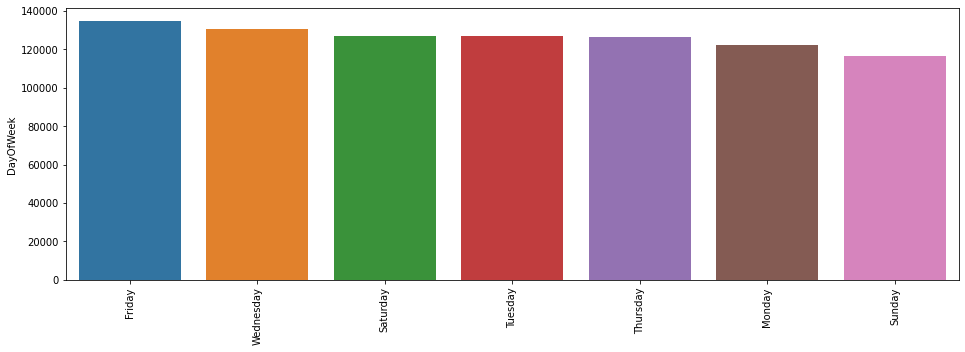

In [19]:
test_Days = test_data.DayOfWeek.value_counts()
test_Day_plot = sns.barplot(x=test_Days.index,y=test_Days)
test_Day_plot.set_xticklabels(test_Days.index,rotation=90)

In [20]:
train_data.describe(include='all')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Hour,Month,Year
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN,NaN,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN,NaN,NaN,NaN
first,2003-01-06 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-05-13 23:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020,13.412655,6.436509,2008.712046
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893,6.549573,3.428972,3.631194
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879,0.000000,1.000000,2003.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427,9.000000,3.000000,2006.000000


In [21]:
#checking that there are no nulls
train_data.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Hour          0
Month         0
Year          0
dtype: int64

In [22]:
test_data.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
Month         0
Year          0
dtype: int64

In [23]:
#checking for unique values per column
train_data.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [24]:
train_data.PdDistrict.unique()


array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [25]:
train_data.Resolution.unique()


array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'],
      dtype=object)

In [26]:
train_data.Address.unique()


array(['OAK ST / LAGUNA ST', 'VANNESS AV / GREENWICH ST',
       '1500 Block of LOMBARD ST', ..., '300 Block of JOHN F KENNEDY DR',
       'FOLSOM ST / ZENO PL', '1000 Block of 22ND AV'], dtype=object)

In [27]:
train_data.X.unique()


array([-122.42589168, -122.42436302, -122.42699533, ..., -122.48124622,
       -122.41850208, -122.39492572])

In [28]:
train_data.Y.unique()


array([37.7745986 , 37.80041432, 37.80087263, ..., 37.77644744,
       37.73394539, 37.73821154])

In [29]:
train_data.Hour.unique()


array([23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3,  2,  1,  0])

In [30]:
train_data.Month.unique()


array([ 5,  4,  3,  2,  1, 12, 11, 10,  9,  8,  7,  6])

In [31]:
train_data.Year.unique()
#end of training columns,wont drop any

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003])

In [32]:
train_data.Resolution.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
878044    False
878045    False
878046    False
878047    False
878048    False
Name: Resolution, Length: 878049, dtype: bool

<AxesSubplot:xlabel='Hour'>

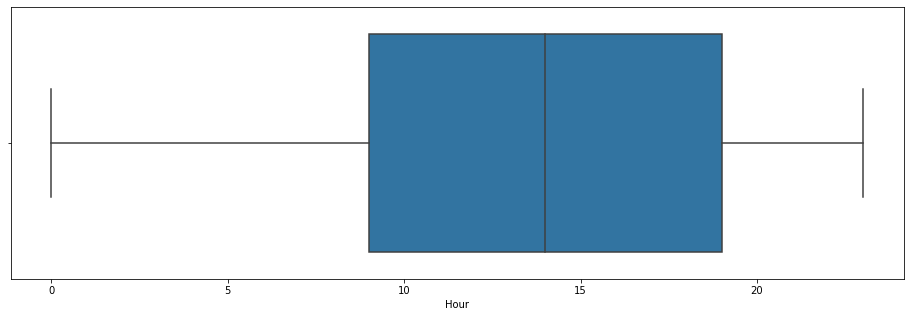

In [33]:
sns.boxplot(data=train_data, x='Hour') #no outliers

<AxesSubplot:xlabel='Year'>

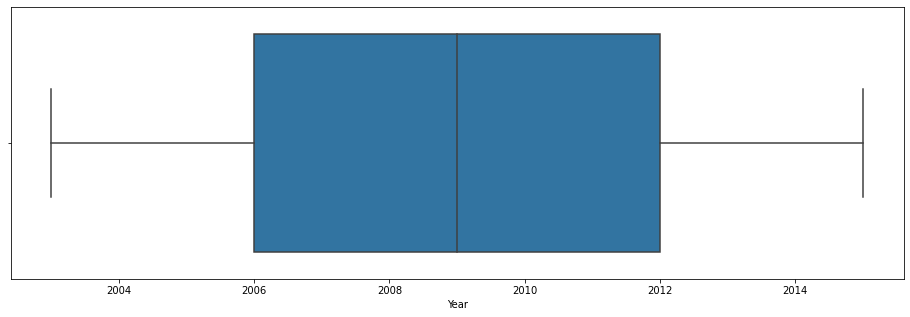

In [34]:
sns.boxplot(data=train_data, x='Year') #no outliers

<AxesSubplot:xlabel='Month'>

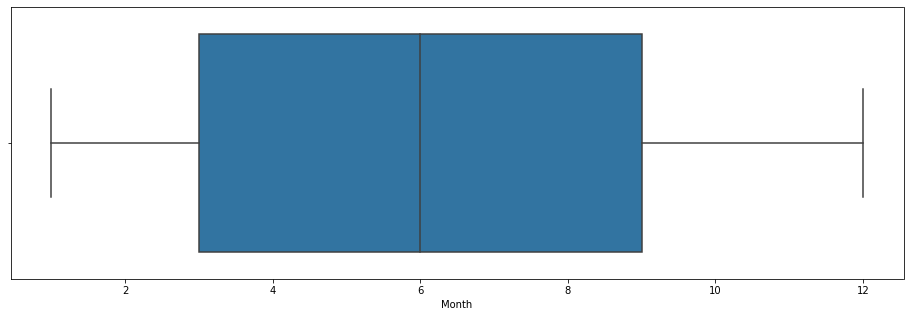

In [35]:
sns.boxplot(data=train_data, x='Month')



<AxesSubplot:xlabel='X'>

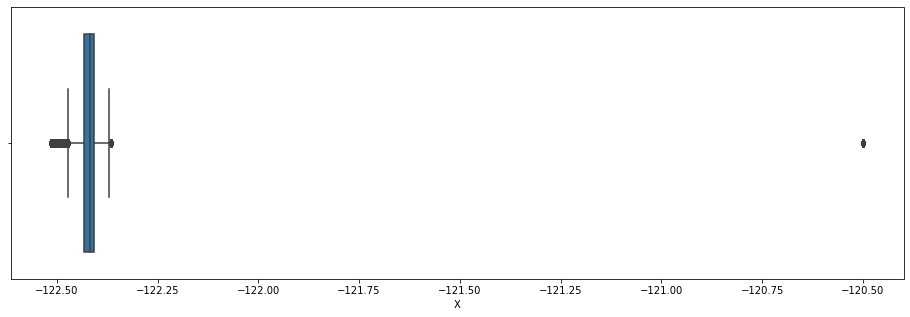

In [36]:
sns.boxplot(data=train_data, x='X')

<AxesSubplot:xlabel='Y'>

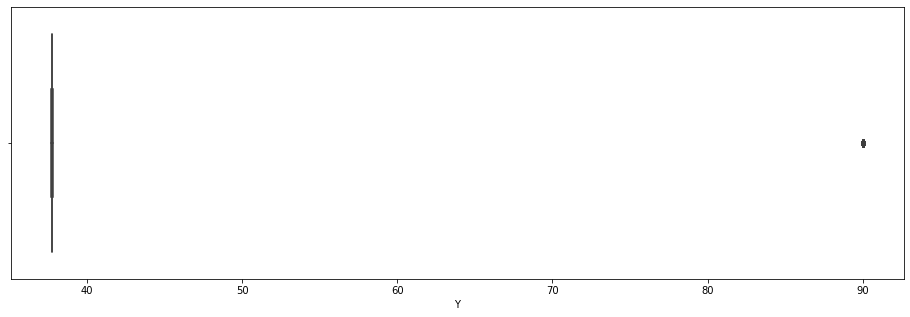

In [37]:
sns.boxplot(data=train_data, x='Y')

In [38]:
#function for outliers
def fix_outliers(df_, colName):
  q1 = df_[colName].quantile(0.25)
  q3 = df_[colName].quantile(0.75)
  range = q3-q1
  whisker_upper = q3+1.5*range
  whisker_lower = q1-1.5*range
  df_[colName] = np.where(df_[colName]>whisker_upper, whisker_upper, np.where(df_[colName]<whisker_lower, whisker_lower, df_[colName]))
  return df_

In [39]:
train_data= fix_outliers(train_data, 'X')
train_data= fix_outliers(train_data, 'Y')

<AxesSubplot:xlabel='Y'>

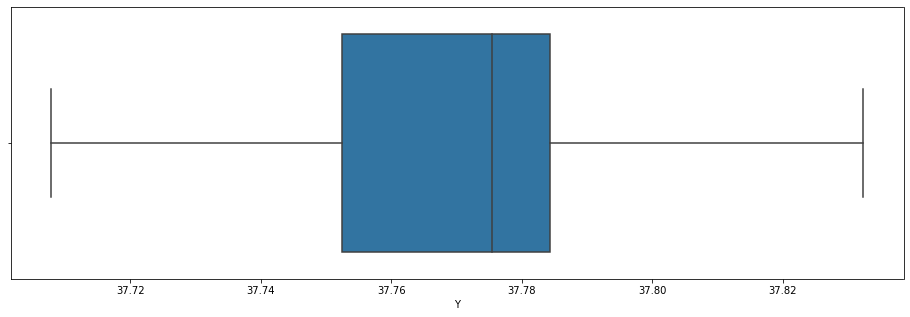

In [40]:
sns.boxplot(data=train_data, x='Y') #outliers fixed

In [41]:
train_data.drop_duplicates()
train_data.shape

(878049, 12)

In [42]:
#dropping undeeded columns
train_data.drop(['Resolution', 'Descript', 'Address', 'Dates','DayOfWeek'], inplace=True, axis=1)

<AxesSubplot:xlabel='X'>

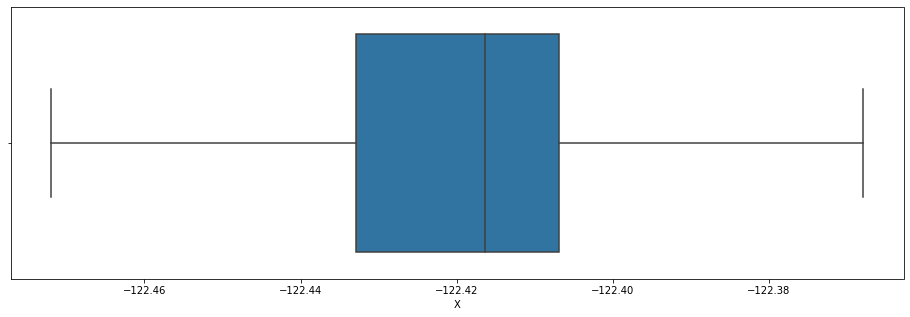

In [43]:
sns.boxplot(data=train_data, x='X') #outliers fixed

In [44]:
#no null values in test data and there is no need to check for unique values
test_data.drop(['Id', 'Address', 'Dates','DayOfWeek'], inplace=True, axis=1) #dropping useless columns

<AxesSubplot:xlabel='X'>

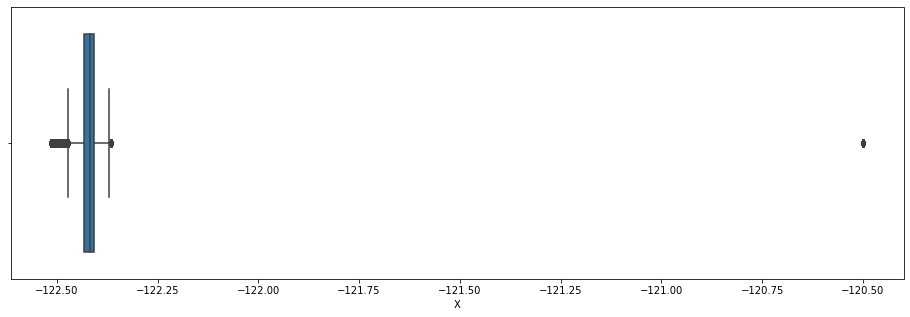

In [45]:
sns.boxplot(data=test_data, x='X')

<AxesSubplot:xlabel='Y'>

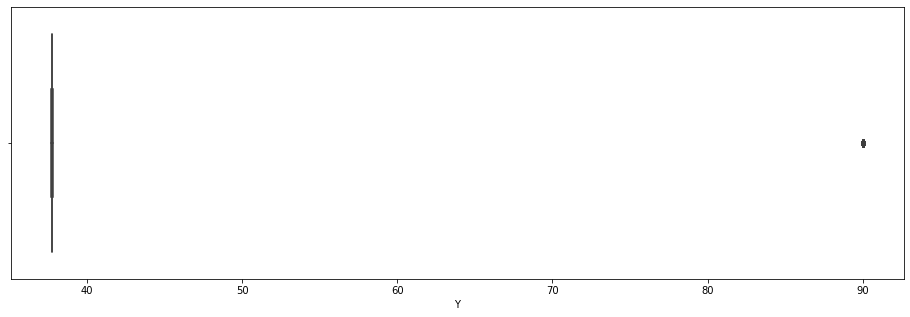

In [46]:
sns.boxplot(data=test_data, x='Y')

In [47]:
test_data= fix_outliers(test_data, 'X')
test_data= fix_outliers(test_data, 'Y')

<AxesSubplot:xlabel='X'>

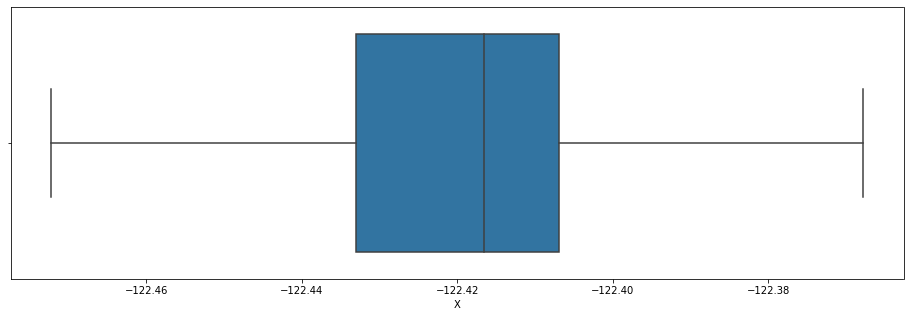

In [48]:
sns.boxplot(data=test_data, x='X')

<AxesSubplot:xlabel='Y'>

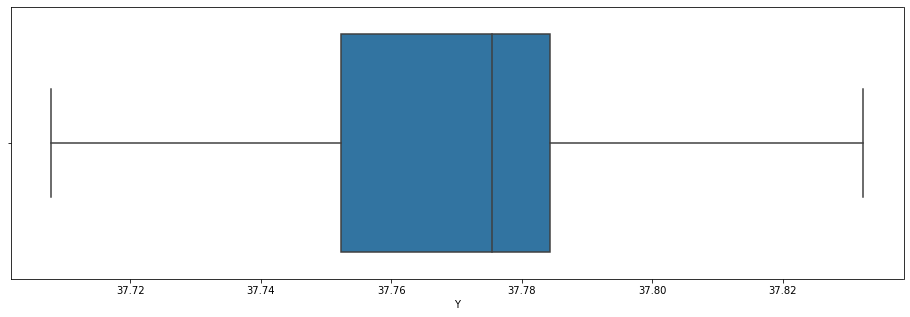

In [49]:
sns.boxplot(data=test_data, x='Y')

In [50]:
test_data.head

<bound method NDFrame.head of        PdDistrict           X          Y  Month  Year
0         BAYVIEW -122.399588  37.735051      5  2015
1         BAYVIEW -122.391523  37.732432      5  2015
2        NORTHERN -122.426002  37.792212      5  2015
3       INGLESIDE -122.437394  37.721412      5  2015
4       INGLESIDE -122.437394  37.721412      5  2015
...           ...         ...        ...    ...   ...
884257    MISSION -122.408983  37.751987      1  2003
884258   NORTHERN -122.425342  37.792681      1  2003
884259  INGLESIDE -122.445418  37.712075      1  2003
884260    BAYVIEW -122.387394  37.739479      1  2003
884261    TARAVAL -122.472234  37.733950      1  2003

[884262 rows x 5 columns]>

In [51]:
le1 = LabelEncoder()
train_data['PdDistrict'] = le1.fit_transform(train_data['PdDistrict'])
test_data['PdDistrict'] = le1.transform(test_data['PdDistrict'])

le2 = LabelEncoder()
X = train_data.drop(columns=['Category'])
y= le2.fit_transform(train_data['Category'])

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [53]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [54]:
print (classification_report(y_test,predictions))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.02      0.03      0.02       280
           1       0.20      0.25      0.22     15449
           2       0.00      0.00      0.00        89
           3       0.00      0.00      0.00        55
           4       0.12      0.13      0.13      7357
           5       0.04      0.05      0.04       907
           6       0.03      0.04      0.03       445
           7       0.34      0.47      0.39     10904
           8       0.00      0.00      0.00       868
           9       0.01      0.01      0.01       253
          10       0.00      0.00      0.00        53
          11       0.05      0.07      0.06        91
          12       0.09      0.11      0.10      2093
          13       0.06      0.07      0.07      3314
          14       0.04      0.03      0.04        29
          15       0.02      0.02      0.02       487
          16       0.38      0.35      0.37     34880
          17       0.06    

In [55]:
rfc = RandomForestClassifier(n_estimators=40,min_samples_split=100 )
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=100, n_estimators=40)

In [56]:
rfc_pred = rfc.predict(X_test)
print ("Train Accuracy: ", accuracy_score(y_train, rfc.predict(X_train)))
print ("Test Accuracy: ", accuracy_score(y_test, rfc_pred))

Train Accuracy:  0.3319903934718887
Test Accuracy:  0.2889983486134047


In [57]:
print (classification_report(y_test,rfc_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       280
           1       0.22      0.11      0.15     15449
           2       0.00      0.00      0.00        89
           3       0.00      0.00      0.00        55
           4       0.23      0.01      0.02      7357
           5       0.19      0.00      0.01       907
           6       0.00      0.00      0.00       445
           7       0.35      0.45      0.39     10904
           8       0.00      0.00      0.00       868
           9       0.00      0.00      0.00       253
          10       0.00      0.00      0.00        53
          11       0.00      0.00      0.00        91
          12       0.17      0.01      0.01      2093
          13       0.33      0.01      0.02      3314
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00       487
          16       0.31      0.75      0.44     34880
          17       0.43    

In [58]:
#model tuning
rfc = RandomForestClassifier(n_estimators=60,min_samples_split=80 )
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print ("Train Accuracy: ", accuracy_score(y_train, rfc.predict(X_train)))
print ("Test Accuracy: ", accuracy_score(y_test, rfc_pred))

Train Accuracy:  0.3464827550862068
Test Accuracy:  0.29197653892147374


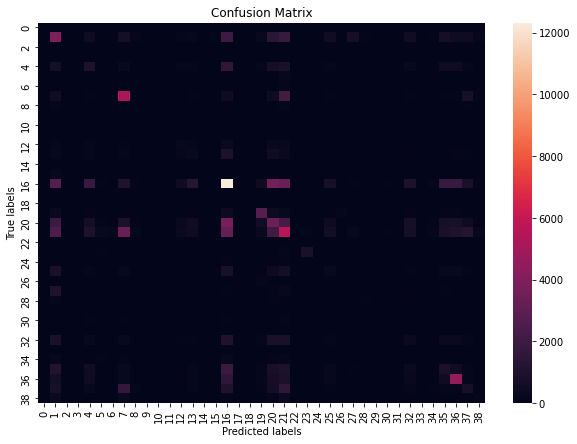

In [59]:
cm = confusion_matrix(y_test,predictions)
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cm, annot=False, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [60]:
svm_clf = SVC(C=0.1, kernel='linear')
svm_clf = svm_clf.fit(X_train[0:3000], y_train[0:3000])
y_pred = svm_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.19890666818518307

In [61]:
#model tuning
svm_clf_2 = SVC(C=1000, kernel='rbf')
svm_clf_2 = svm_clf_2.fit(X_train[0:3000], y_train[0:3000])
y_pred_2 = svm_clf_2.predict(X_test)
accuracy_score(y_pred_2, y_test)

0.19862194635840782